In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.dates as mdates
from scipy.stats import linregress
#from api_keys import nas_api_key
from functools import reduce
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
from matplotlib.dates import AutoDateLocator, AutoDateFormatter, date2num
from decimal import Decimal

In [3]:
# import data files
facebookDataPath = "data/Facebook.csv"
amazonDataPath = "data/Amazon.csv"
appleDataPath = "data/Apple.csv"
netflixDataPath = "data/Netflix.csv"
googleDataPath = "data/Google.csv"

# read and display the data
facebook_csv = pd.read_csv(facebookDataPath)
amazon_csv = pd.read_csv(amazonDataPath)
apple_csv = pd.read_csv(appleDataPath)
netflix_csv = pd.read_csv(netflixDataPath)
google_csv = pd.read_csv(googleDataPath)

In [4]:
facebook_csv.insert(0, "Label", "Facebook")
amazon_csv.insert(0, "Label", "Amazon")
apple_csv.insert(0, "Label", "Apple")
netflix_csv.insert(0, "Label", "Netlfix")
google_csv.insert(0, "Label", "Google")

In [5]:
# locate data only for 2022 -- rows 45 thru 295
fb = facebook_csv.iloc[44:294, :]
am = amazon_csv.iloc[44:294, :]
ap = apple_csv.iloc[44:294, :]
nf = netflix_csv.iloc[44:294, :]
gl = google_csv.iloc[44:294, :]

In [6]:
def clean_currency(x):
    if isinstance(x,str):
        return(x.replace('$','').replace(',',''))
    return(x)

In [7]:
def linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xAxis, yAxis)
    regression = xAxis * slope + intercept
    linEQ = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
    plt.scatter(xAxis,yAxis)
    plt.plot(xAxis,regression,"r-")
    print(f"The r-value is {rvalue}")
    
    plt.annotate(linEQ,(x_lin_plot,y_lin_plot),fontsize=10,color="red")
    plt.xlabel(f"{xLabel}")
    plt.ylabel(f"{yLabel}")

In [24]:
TreasuryRatesDataPath = "data/TreasuryRates.csv"
TreasuryRates_csv = pd.read_csv(TreasuryRatesDataPath)
TreasuryRates_csv.insert(0, "Label", "Treasury Rates")
tr = TreasuryRates_csv.iloc[45:293, :]
fb = facebook_csv.iloc[45:295, :]

mergeIntRateFB = pd.merge(fb, tr, on='Date', how = "outer")
mergeIntRateFB.dropna(axis='columns')
mergeIntRateFB.fillna(0)

,Label_x,Date,Close/Last,Volume,Open,High,Low,Label_y,LT Composite > 10 Yrs,Treasury 20-Yr CMT,Extrapolation Factor
0,Facebook,12/28/22,$115.62,19612470,$116.25,$118.15,$115.51,Treasury Rates,0.009828,0.007317,0.0
1,Facebook,12/27/22,$116.88,21392310,$117.93,$118.60,$116.05,Treasury Rates,0.025189,0.027569,0.0
2,Facebook,12/23/22,$118.04,17796630,$116.03,$118.18,$115.54,Treasury Rates,0.023196,0.020460,0.0
3,Facebook,12/22/22,$117.12,23618120,$117.20,$118.62,$114.38,Treasury Rates,-0.005128,-0.005089,0.0
4,Facebook,12/21/22,$119.76,20392800,$116.70,$120.34,$115.62,Treasury Rates,0.000000,-0.002538,0.0
...,...,...,...,...,...,...,...,...,...,...,...
245,Facebook,1/6/22,$332.46,27962810,$322.82,$339.17,$322.72,Treasury Rates,0.000000,0.000000,0.0
246,Facebook,1/5/22,$324.17,20564520,$333.02,$335.76,$323.84,Treasury Rates,0.009709,0.009524,0.0
247,Facebook,1/4/22,$336.53,15997970,$339.95,$343.09,$331.87,Treasury Rates,0.030000,0.024390,0.0
248,Facebook,1/3/22,$338.54,14562850,$338.30,$341.08,$337.19,Treasury Rates,0.058201,0.056701,0.0


In [25]:
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    #plt.xlabel("Latitude")
    #plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()
    

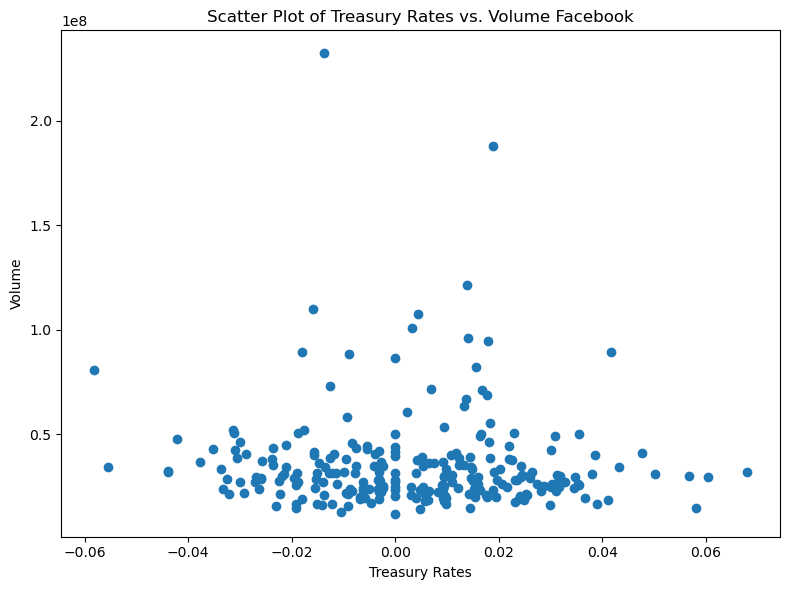

In [26]:
Volume = mergeIntRateFB['Volume']
IntRate2 = mergeIntRateFB['LT Composite > 10 Yrs']
plt.rcParams["figure.figsize"] = [8.00, 6.00]
plt.rcParams["figure.autolayout"] = True
#fig, ax = plt.subplots()
#ytick_loc = [40, 80, 120, 160, 200, 240, 280, 320, 340]
#ax.set_yticks(ytick_loc)
#plt.tick_params(left = False,labelleft = False)
# Incorporate the other graph properties
plt.title("Scatter Plot of Treasury Rates vs. Volume Facebook")
plt.xlabel("Treasury Rates")
plt.ylabel("Volume")
plt.scatter(mergeIntRateFB['LT Composite > 10 Yrs'],mergeIntRateFB['Volume'])

plt.show()